In [1]:
import numpy as np
from scipy.optimize import fsolve

# Reinforcement Learning and Learning Based Control

Reinforcement learning in Control Theory is a paradigm that lets an agent learn optimal decision-making strategies by iteratively exploring its environment and receiving feedback in the form of rewards or punishments. Learning Based Control determines a stabilizing controller from input-output data.



# Markov Decision Process
Markov Decision Process (MDP) mathematically models decision-making under uncertainty. MDPs consist a set of states, set of actions, a deterministic or stochastic transition model, a reward or cost function.

Definitions in MDP

1. State Space: $x \in X$ or $s \in S$. In robotics, state can represent the pose as an example.

2. Action: This space is also called the control space. Examples of actions can be given as moving to a discrete neighboring state, and torques applied to a joint.

3. Reward or Cost Function: The reward $r(x,a)$ or cost $c(x,a)$ of taking an action $a$ at state $x$. The cost function can be defined as the negative of a given reward function and switch of the max (rewards) to min (costs). It should be noted, however, that sometimes the use of the phrase cost is meant to imply that the cost is strictly positive.


MDP represents environments with state-spaces that allow an agent to make decisions. In search algorithms, we return a sequence of actions that lead to the goal state, and actions always translate to states. In reinforcement learning, we return a sequence of states that lead to the goal state.  To do this, the agent is rewarded for taking actions that lead to the goal state. MDP is a richer environment representation that allows randomness that other machine learning strategies cannot handle. MDP uses stochastic transition probabilities to model the environment. Stochastic transitions include randomness, for example, the agent might move in a direction and a condition might occur which puts the agent in an unmodeled condition. In robotics, the ability to maintain function in uncertainties is called resiliance. Therefore, MDP is an important tool for kinematic resiliance.

Probability distributions include $s'$ what state we end up in, $s$ given the current state that we are in, and $a$ the action that we choose.

$$Pr(s|s', a)=0.2$$

This representation means three things: (i) the next state depends only one the previous state, (ii)  the probability function is the description and representation of the environment, (iii) the agent generates its own data.

To determine how to acquire 'good' rewards, we propose a policy. A policy, represented with $\pi$, is a function of states that maps states to actions, and tells which action to take in each state.

A policy is different than a sequence of actions. In sequence of actions, if the transition takes the agent to an unmodeled or uncertain state, the algorithm runs out of options. However, policy can be evaluated in the uncertain state.

We consider a rectangular gridworld representation (see below) of a simple finite Markov Decision Process (MDP). The cells of the grid correspond to the states of the environment. At each cell, four actions are possible: north, south, east, and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its location unchanged, but also result in a reward of -1. In other words, rewards are positive for goals, negative for running into undesirable states, and zero the rest of the time.

$$
\begin{array}{|c|c|c|c|}
\hline
0 & 0 & 0 & 0 \\
\hline
0 & 0 & -1 & 0 \\
\hline
\colorbox{blue}{}& 0 & -1 & 1 \\
\hline
\end{array}
$$



Next we define the rewards for the states. Those will be of +1 for the state that is desirable, of -1 for states that have to be avoided and of 0 for all other states. The Bellman equation expresses a relationship between the value of a state and the values of its successor states and must hold for each state for the value function $v_{\pi}$

$$ v_{\pi}(s) = \sum_a \pi(a \mid s) \sum_{s'| r} p(s', r \mid s, a) [ r + \gamma v_{\pi}(s')] $$

where the actions, $a$ are taken from the set $A(s)$ that the next states, $s'$ are taken from the set $S$ and that the rewards, $r$ are taken from the set $R$.

Suppose the agent selects all four actions with equal probability in all states. The figure below shows the value function, $v_{\pi}$, for this policy, for the discounted reward case with $\gamma=0.9$

$$
\begin{array}{|c|c|c|c|}
\hline
0.42 & 0.48 & 0.52 & 0.63 \\
\hline
0.38 & 0.43 & \color{orange}{-1} & 0.72 \\
\hline
0.34 & 0.38 & \color{orange}{-1} & \color{green}{+1} \\
\hline
\end{array}
$$

Therefore the agent movement can be tracked so:

$$
\begin{array}{|c|c|c|c|}
\hline
 & \textcolor{lightblue}{\rightarrow} & \textcolor{lightblue}{\rightarrow} & \textcolor{lightblue}{\downarrow} \\
\hline
\textcolor{lightblue}{\rightarrow} & \textcolor{lightblue}{\uparrow} & \textcolor{orange}{-1} & \textcolor{lightblue}{\downarrow} \\
\hline
\textcolor{lightblue}{\uparrow\rightarrow} & \textcolor{lightblue}{\uparrow} & \textcolor{orange}{-1} & \textcolor{green}{+1} \\
\hline
\end{array}
$$


The logic can be seen in the code snippet below

In [5]:
#Hyperparameters
SMALL_ENOUGH = 0.005
GAMMA = 0.9
NOISE = 0.1

#Define all states
all_states=[]
for i in range(3):
    for j in range(4):
            all_states.append((i,j))

#Define rewards for all states
rewards = {}
for i in all_states:
    if i == (1,2):
        rewards[i] = -1
    elif i == (2,2):
        rewards[i] = -1
    elif i == (2,3):
        rewards[i] = 1
    else:
        rewards[i] = 0

#Dictionary of possible actions. We have two "end" states (1,2 and 2,2)
actions = {
    (0,0):('D', 'R'),
    (0,1):('D', 'R', 'L'),
    (0,2):('D', 'L', 'R'),
    (0,3):('D', 'L'),
    (1,0):('D', 'U', 'R'),
    (1,1):('D', 'R', 'L', 'U'),
    (1,3):('D', 'L', 'U'),
    (2,0):('U', 'R'),
    (2,1):('U', 'L', 'R'),
    }

#Define an initial policy
policy={}
for s in actions.keys():
    policy[s] = np.random.choice(actions[s])

#Define initial value function
V={}
for s in all_states:
    if s in actions.keys():
        V[s] = 0
    if s ==(2,2):
        V[s]=-1
    if s == (1,2):
        V[s]=-1
    if s == (2,3):
        V[s]=1

iteration = 0
while True:
    biggest_change = 0
    for s in all_states:
        if s in policy:

            old_v = V[s]
            new_v = 0

            for a in actions[s]:
                if a == 'U':
                    nxt = [s[0]-1, s[1]]
                if a == 'D':
                    nxt = [s[0]+1, s[1]]
                if a == 'L':
                    nxt = [s[0], s[1]-1]
                if a == 'R':
                    nxt = [s[0], s[1]+1]

                #Choose a new random action to do (transition probability)
                random_1=np.random.choice([i for i in actions[s] if i != a])
                if random_1 == 'U':
                    act = [s[0]-1, s[1]]
                if random_1 == 'D':
                    act = [s[0]+1, s[1]]
                if random_1 == 'L':
                    act = [s[0], s[1]-1]
                if random_1 == 'R':
                    act = [s[0], s[1]+1]

                #Calculate the value
                nxt = tuple(nxt)
                act = tuple(act)
                v = rewards[s] + (GAMMA * ((1-NOISE)* V[nxt] + (NOISE * V[act])))
                if v > new_v: #Is this the best action so far? If so, keep it
                    new_v = v
                    policy[s] = a

       #Save the best of all actions for the state
            V[s] = new_v
            biggest_change = max(biggest_change, np.abs(old_v - V[s]))

   #See if the loop should stop now
    if biggest_change < SMALL_ENOUGH:
        break
    iteration += 1

### Optimal Policy

$$ \pi^*(x,t) = {argmin}_{a}[c(x,a)+V^*(\tau(x,a),t+1)] $$

Optimal policy computing algorithm can be seen below

In [ ]:
def OptimalPolicy(x,T)
    for t= T-1,...,0 do
        for x in X do
            if t= T-1 then
                

Exercise - 3

Task 1

a) Give $v_\pi (s)$ in terms of $q\pi (s,a)$


b) Give $\pi_* (s,a)$ in terms of $q_*(s,a)$



### Task 2: Reward Offset in Non-terminating Trajectories
Show that this measure only adds a factor $v_c$, to the state values and hence does not change the  optimal behavior. Express $v_c$ in terms of $c$ and $\gamma$

$v_\pi(s) = \mathbb{E}_\pi[G_t|S_t=s] = \mathbb{E}_\pi \left[ \sum_{k}^{\infty} \gamma^k R_(t+k+1) | S_t = s \right]$ 




### Task 3 Action Value Function





### Task 4: Bellman Optimality Equations

<img src="img/recycling_bot.png" alt="Recycling Robot" width=40% height=40%>

a) Recycling Bot: Derive the Bellman optimality equations of the recycling robot and solve them for the optimal state value function.

$ v_*(s) = max_{a} q_*(s,a) $ \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $max {p(h,r_s | h,s) [r_s + \gamma v_* (h)] } $


In [4]:
# MDP Parameters
R_S = 3
R_W = 1
R_E = -30

ALPHA = 0.9
BETA = 0.5
GAMMA = 0.9


# Forumulation of Bellman Optimality Equation
def bell_opt_eq_rb(v):
    v_h = v[0]
    v_l = v[1]

    F = np.empty(2)
    F[0] = v_h - max(R_S + GAMMA*(ALPHA*v_h + (1-ALPHA)*v_l), R_W + GAMMA * v_h)
    F[1] = v_l - max(BETA*R_S + R_E*(1-BETA) + GAMMA*((1-BETA)*v_h + BETA*v_l), R_W + GAMMA*v_l, GAMMA*v_h)
    return F

## Value Iteration

Value iteration algorithm optimizes policies to navigate statespace.




In [ ]:
iteration = 0
while True:
    biggest_change = 0
    for s in all_states:
        if s in policy

            old_v = V[s]
            new_v = 0

            for a in actions[s]:
                if a == 'U'       

## Uncertainty

Markov Decision Processes often assume a fully modeled probability state model. If behavior leads outside of the model, some form of exception handling needs to be conducted

## Recursive State Estimation in Probabilistic Robotics

The theory was suggested by Sebastian Thrun et.al, one of the most important parts about Markov Decision Processes is the idea that you do not need to know where your coming from but only your current state, the transition between states is what is modeled and the resulting state, not a whole history sequence of states within each state. Probabilistic Robotics mostly focuses on the problem of simultaneous localization and mapping for mobile robotics. The fundamental ideas within Recursive State Estimation are transferable, there are a number of algorithm to choose from most important for the state modeling are variations of what is called a particle filter (there quite a few different types) and Gaussian Mixture Models (sometimes referred to as multi hypothesis Kalman filter). 


## Decision Trees

This section will include Monte Carlo tree search, Bayesian Filter, trade-off factor between exploration and exploitation, and Upper Confidence Trees.


### Monte Carlo Tree Search
In an environment in which either complete modelling is not possible or decision tree is still 



### Future Directions in Reinforcement Learning
- Extrapolating the learning to uncertain states
- Sample efficiency
- Multi-agent RL evolution
- Robustness

# MDPs with State Uncertainty

This chapter will discuss adaptive control theories in Markov Decision Processes. 


## Adaptive Control Methods

In general, adaptive control is the method used by a controller which must adapt to a controlled system with parameters which vary, or are initially uncertain. It is different than robust control, which guarantees that if the changes are within given bounds the control law need not be changed, while adaptive control is concerned with control law changing itself.


### Partially Observable Markov Decision Process (POMDP)

In 1965, the general framework of Markov Decision processes with incomplete information about the state was described by the control theorist Karl Johan Åström. 

A Partially Observable Markov Decision Process is the 7-tuple problem formulation of an MDP with state uncertainty where the true state is not know, only a belief about the true state exists using observations.


| Variable | Description | POMDPs Interface |
|----------|:---------:|-------:|
| $S$ | State Space | POMDP.states|
| $A$ | Action Space | POMDPs.actions|
| $O$ | Observation Space | POMDPs.observations|
| $T(s'\|s,a)$ | Transition Function | POMDPs.transition|
| $R(s,a)$ | Reward Function | POMDPs.reward|
| $O(o\|s')$| Observation Function | POMDPs.observation|
| $\gamma \in [0,1]$ | Discount Factor | POMDPs.discount |




&nbsp;

<div style="display: flex;">
    <div style="flex: 1; padding-left: 10px;">
        <div>
            <h3>Crying Baby Problem</h3>
            <p>An example for POMDP is the Crying Baby Problem which is a simple model with 2 states, 2 actions, and 2 observations.

$$
s_t = \left[hungry, full \right]\\
a_t = \left[feed, ignore \right]\\
o_t = \left[crying, quiet \right]\\
$$


&nbsp;

$$
\begin{array}{cccc}
\text{States} & \text{Actions} & \text{Observations} & \text{Transitions} \\
\hline
S_1: \text{Hungy} & A_1: \text{Feed} & O_1: \text{Silent} & S_1 \rightarrow S_1 \\
S_2: \text{Full} & A_2: \text{Ignore} & O_2: \text{Crying} & S_1 \rightarrow S_2 \\
& & & S_2 \rightarrow S_1 \\
\end{array}
$$

We cannot  directly say that the baby is truly in the hungry state, but we can observe that the baby is crying and update our belief about the true state using this information.
</p>
        </div>
    </div>
    <div>
        <div style="flex: 1; padding-right: 10px;">
        <img src="img/pomdp_cryingbaby.png" alt="Your Image" style="width: 80%;">
    </div>
</div>


Initial Belief: [0.5 0.5]
Updated Belief after action 'feed' and observation 'crying': [0.50943396 0.49056604]
Selected Action based on belief: feed


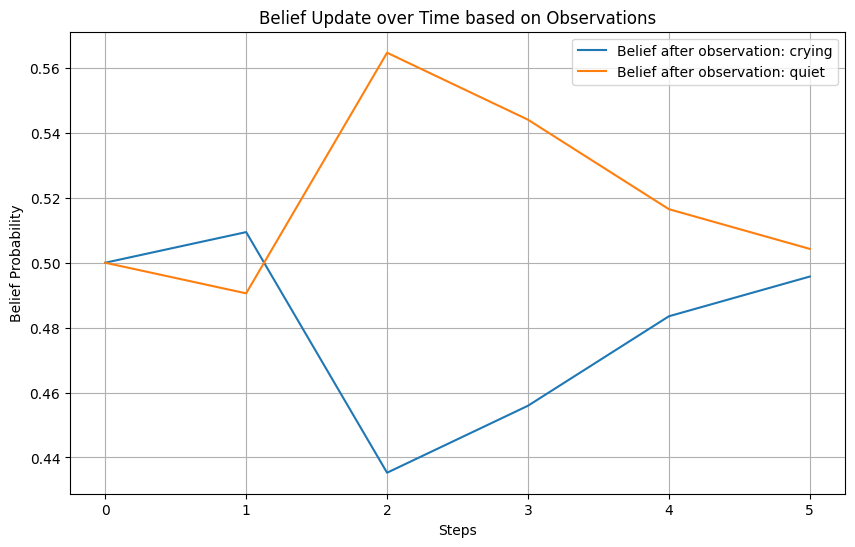

In [9]:
class POMDP_CryingBaby:
    def __init__(self):
        # Define states, actions, and observations
        self.states = ['hungry', 'full']
        self.actions = ['feed', 'ignore']
        self.observations = ['crying', 'quiet']
        
        # Transition probabilities
        self.transition_probs = np.array([
            # State: hungry
            [[0.6, 0.4],  # Action: feed
             [0.3, 0.7]], # Action: ignore
            # State: full
            [[0.1, 0.9],  # Action: feed
             [0.7, 0.3]]] # Action: ignore
        )
        
        # Observation probabilities
        self.observation_probs = np.array([
            # State: hungry
            [[0.8, 0.2],  # Observation: crying
             [0.1, 0.9]], # Observation: quiet
            # State: full
            [[0.3, 0.7],  # Observation: crying
             [0.9, 0.1]]] # Observation: quiet
        )
        
        # Initial belief
        self.belief = np.array([0.5, 0.5])
    
    def update_belief(self, action, observation):
        new_belief = np.zeros_like(self.belief)
        for i in range(len(self.states)):
            for j in range(len(self.states)):
                new_belief[i] += self.transition_probs[i][j][self.actions.index(action)] * \
                                 self.observation_probs[i][self.observations.index(observation)][j] * \
                                 self.belief[j]
        self.belief = new_belief / sum(new_belief)
        return self.belief
    
    def select_action(self):
        return self.actions[np.argmax(self.belief)]
        

pomdp = POMDP_CryingBaby()

# Initial belief
print("Initial Belief:", pomdp.belief)

# Update belief based on action and observation
action = 'feed'
observation = 'crying'
pomdp.update_belief(action, observation)
print("Updated Belief after action '{}' and observation '{}':".format(action, observation), pomdp.belief)

# Action based on belief
print("Selected Action based on belief:", pomdp.select_action())


def plot_belief_update(actions, observations):
    pomdp = POMDP_CryingBaby()
    beliefs_over_time = [pomdp.belief]
    
    for action, observation in zip(actions, observations):
        pomdp.update_belief(action, observation)
        beliefs_over_time.append(pomdp.belief)
    
    beliefs_over_time = np.array(beliefs_over_time)
    
    plt.figure(figsize=(10, 6))
    for i, observation in enumerate(pomdp.observations):
        plt.plot(beliefs_over_time[:, i], label='Belief after observation: {}'.format(observation))
    plt.xlabel('Steps')
    plt.ylabel('Belief Probability')
    plt.title('Belief Update over Time based on Observations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
actions = ['feed', 'ignore', 'feed', 'ignore', 'feed']
observations = ['crying', 'quiet', 'crying', 'quiet', 'crying']
plot_belief_update(actions, observations)

### POMDP Policies and Beliefs
While policies in MDPs map a state to an action, in POMDPs, policies map belief states additionally.

In the Crying Baby Problem, we have two policies:
- FeedWhenCrying
- FeelWhenBelievedHungry

Beliefs are a vector of probabilities that represent a state. The belief vector must be non-negative and sum to 1 in order to be a valid probability distribution

$b = \left[p(hungry),  p(full) \right]$


In [ ]:
def policy_cryingbaby: 
    if [b[1] > b[2]
        return FEED
    else
        return IGNORE
    end

### Belief Updating

Belief Updater is a Bayesian Filter that updates the current belief of the babies actual state (which is not observed directly).

For staters we use a uniform belief over where $p(hungry)=0.5$ and $p(full)=0.5$

In [ ]:
b0 = uniform_belief(pomdp); b0.b

Then we can update our belief based on our action and subsequent observation.

In [ ]:
begin
    a1 = IGNORE
    o1 = CRYING
    b1 = update(updater(pompd), b0, a1, o1)
    b1.b
end

# non-Markov Environments

### Defining Singularity

Singularity is created at the point when the equations produce outputs on the scale of infinity. In robotics context, this refers to situations where the robot's motion or kinematics reach a critical point, approaching infinity. As a unique challenge in robotics, the output values become extremely large or unbounded, which causes numerical instability and unpredictability in the robot's behavior and in controlling the robot motion.